In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import load_npz
import os

In [2]:
# Load your features
features_dir = 'emotionverse_features'

# Load sparse features (BoW, TF-IDF)
X_bow = load_npz(os.path.join(features_dir, 'bow_features.npz'))
X_tfidf = load_npz(os.path.join(features_dir, 'tfidf_features.npz'))

# Load dense features (embeddings)
X_embeddings = np.load(os.path.join(features_dir, 'embedding_features.npy'))
X_tfidf_embeddings = np.load(os.path.join(features_dir, 'tfidf_embedding_features.npy'))

# Load labels
labels_df = pd.read_csv(os.path.join(features_dir, 'emotionverse_labels.csv'))


In [3]:
# Feature statistics - analyze sparsity, range, etc.
print(f"BoW Shape: {X_bow.shape}, Density: {X_bow.nnz / (X_bow.shape[0] * X_bow.shape[1]):.6f}")
print(f"TF-IDF Shape: {X_tfidf.shape}, Density: {X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1]):.6f}")
print(f"Embeddings Shape: {X_embeddings.shape}")
print(f"TF-IDF Embeddings Shape: {X_tfidf_embeddings.shape}")

BoW Shape: (1874, 3081), Density: 0.004459
TF-IDF Shape: (1874, 3081), Density: 0.004459
Embeddings Shape: (1874, 25)
TF-IDF Embeddings Shape: (1874, 25)


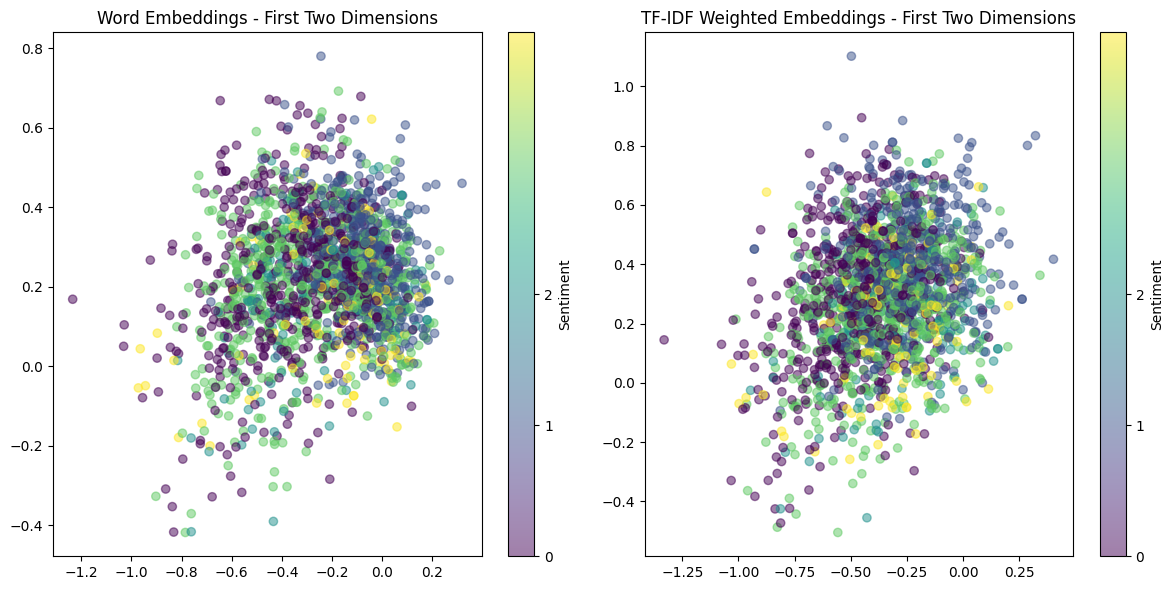

In [5]:
# Visualize embedding features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Word Embeddings - First Two Dimensions")
plt.scatter(X_embeddings[:, 0], X_embeddings[:, 1], alpha=0.5, 
            c=[{'Positive': 0, 'Negative': 1, 'Ambiguous': 2, 'Mixed': 3, 'Neutral': 4}[s] for s in labels_df['sentiment']])
plt.colorbar(ticks=[0, 1, 2], label='Sentiment')

plt.subplot(1, 2, 2)
plt.title("TF-IDF Weighted Embeddings - First Two Dimensions")
plt.scatter(X_tfidf_embeddings[:, 0], X_tfidf_embeddings[:, 1], alpha=0.5,
            c=[{'Positive': 0, 'Negative': 1, 'Ambiguous': 2, 'Mixed': 3, 'Neutral': 4}[s] for s in labels_df['sentiment']])
plt.colorbar(ticks=[0, 1, 2], label='Sentiment')
plt.tight_layout()
plt.show()

In [6]:
# Dimensionality reduction for visualization 
from sklearn.manifold import TSNE

# Apply t-SNE to embeddings
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(X_embeddings[:1000])  # Limit to 1000 samples for speed


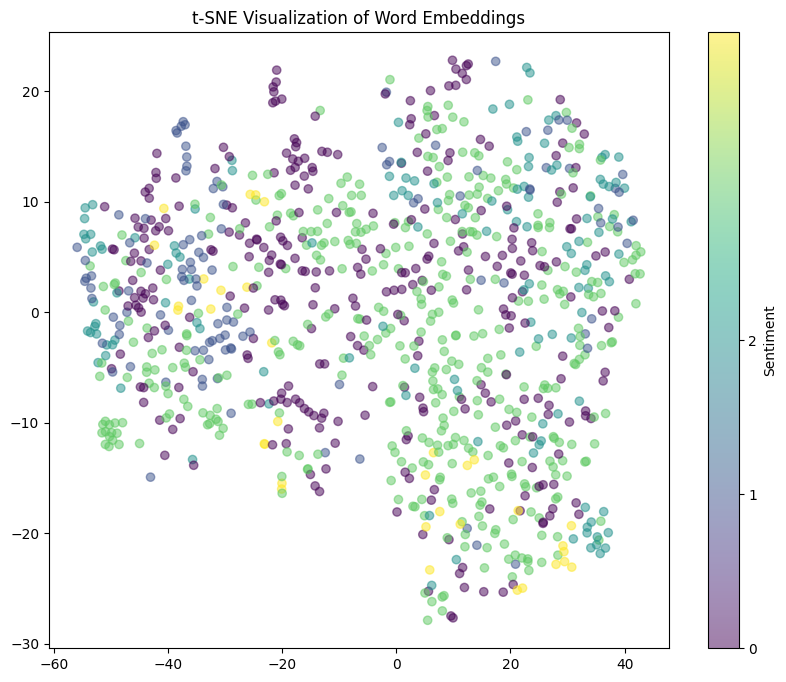

In [8]:
# Visualize in 2D
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5,
            c=[{'Positive': 0, 'Negative': 1, 'Ambiguous': 2, 'Mixed': 3, 'Neutral': 4}[s] for s in labels_df['sentiment'][:1000]])
plt.colorbar(ticks=[0, 1, 2], label='Sentiment')
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

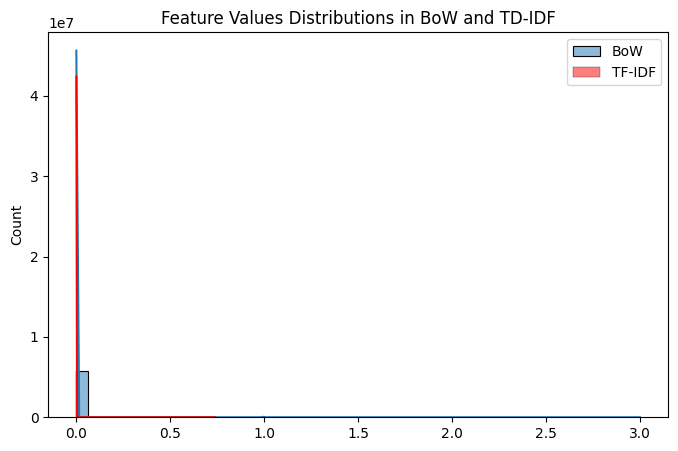

In [14]:
# Density of the Features
plt.figure(figsize=(8, 5))
sns.histplot(X_bow.toarray().flatten(), bins=50, kde=True, label='BoW')
sns.histplot(X_tfidf.toarray().flatten(), bins=50, kde=True, label='TF-IDF', color='red')
plt.title("Feature Values Distributions in BoW and TD-IDF")
plt.legend()
plt.show()

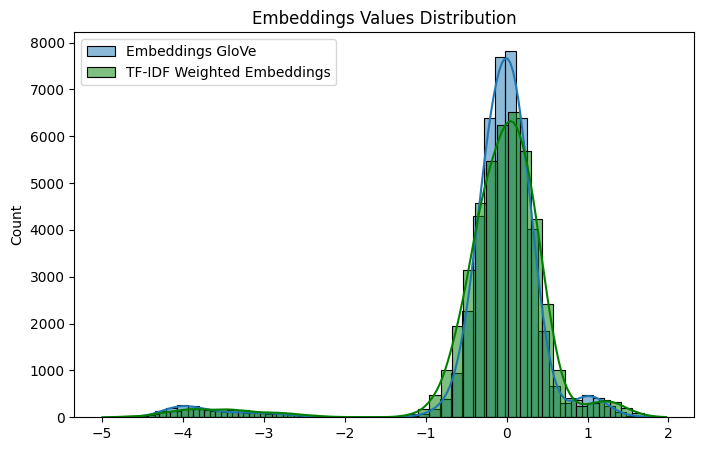

In [16]:
# Embeddings Histogram
plt.figure(figsize=(8, 5))
sns.histplot(X_embeddings.flatten(), bins=50, kde=True, label='Embeddings GloVe')
sns.histplot(X_tfidf_embeddings.flatten(), bins=50, kde=True, label='TF-IDF Weighted Embeddings', color='green')
plt.title("Embeddings Values Distribution")
plt.legend()
plt.show()

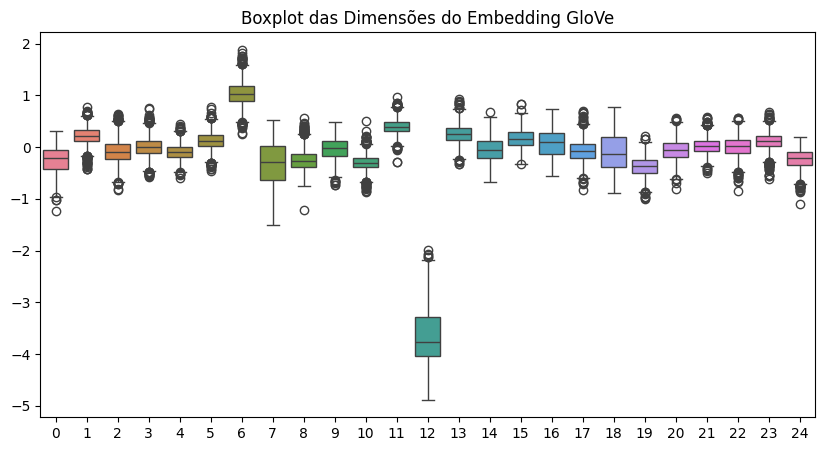

In [11]:
# 4. Boxplot das Features Embeddings
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(X_embeddings))
plt.title("Boxplot das Dimensões do Embedding GloVe")
plt.show()

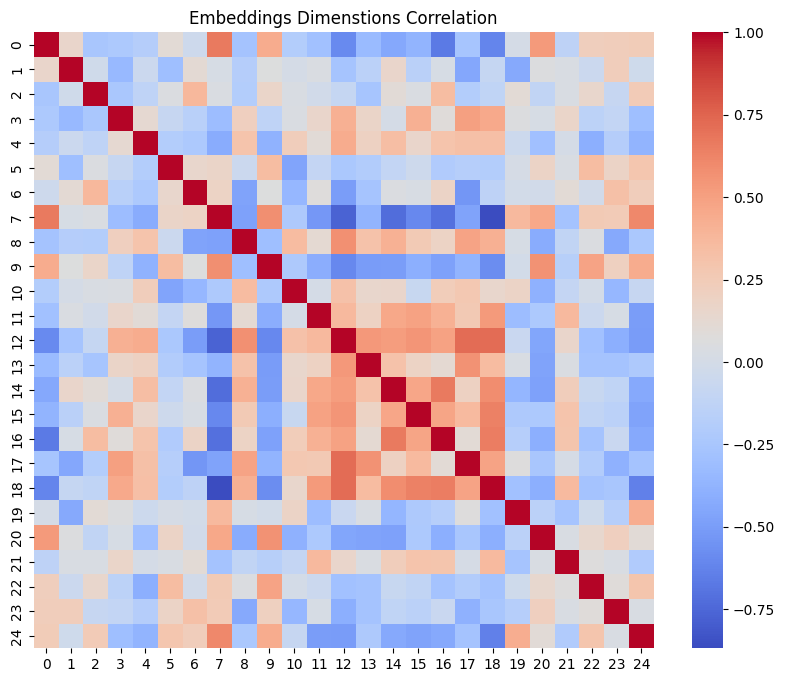

In [17]:
# Embeddings Dimenstions Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_embeddings).corr(), cmap='coolwarm', annot=False)
plt.title("Embeddings Dimenstions Correlation")
plt.show()